In [50]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model

!pip install scikit-learn

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import pandas as pd

kwargs = {'test_size': 0.25, 'random_state': 42}

iris = datasets.load_iris()
tts = skms.train_test_split(iris.data, iris.target, **kwargs)
(iris_train, iris_test, iris_train_tgt, iris_test_tgt) = tts

wine = datasets.load_wine()
tts = skms.train_test_split(wine.data, wine.target, **kwargs)
(wine_train, wine_test, wine_train_tgt, wine_test_tgt) = tts

diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data, diabetes.target, **kwargs)
(diabetes_train_ftrs, diabetes_test_ftrs, diabetes_train_tgt, diabetes_test_tgt) = tts

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [53]:
print(wine_df.var())

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64


In [54]:
print(wine_df['hue'].max() - wine_df['hue'].min())

1.23


In [55]:
print(wine_df['proline'].max() - wine_df['proline'].min())

1402.0


In [56]:
from sklearn.feature_selection import VarianceThreshold

varsel = VarianceThreshold(threshold=1.0)

transformed_data = varsel.fit_transform(wine_train)

print("first_example")
print(transformed_data[0],
     wine_train[0, wine_train.var(axis=0) > 1.0], sep='/n')

first_example
[   2.36   18.6   101.      3.24    5.68 1185.  ]/n[   2.36   18.6   101.      3.24    5.68 1185.  ]


In [57]:
print(varsel.get_support())

[False  True False  True  True False  True False False  True False False
  True]


In [58]:
keepers_idx = varsel.get_support()
keepers = np.array(wine.feature_names)[keepers_idx]
print(keepers)

['malic_acid' 'alcalinity_of_ash' 'magnesium' 'flavanoids'
 'color_intensity' 'proline']


In [59]:
minmax = skpre.MinMaxScaler().fit_transform(wine_train)
print(np.sort(minmax.var(axis=0)))

[0.02234776 0.02638179 0.03170332 0.03308611 0.03608801 0.04466442
 0.04734828 0.04920204 0.04971407 0.05691799 0.05803648 0.05865486
 0.07095709]


In [60]:
import numpy as np
import sklearn.pipeline as pipeline
import sklearn.preprocessing as skpre
import sklearn.feature_selection as ftr_sel

pipe = pipeline.make_pipeline(skpre.MinMaxScaler(),
                              ftr_sel.VarianceThreshold(threshold=0.05))
pipe.fit_transform(wine_train).shape

keepers_idx = pipe.steps[1][1].get_support()
print(np.array(wine.feature_names)[keepers_idx])

['nonflavanoid_phenols' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


In [61]:
n = len(diabetes_train_ftrs)

x = diabetes_train_tgt[np.newaxis,:]
y = diabetes_train_ftrs
cov_via_dot = np.dot(x - x.mean(), y-y.mean() / n)

cov_via_np = np.cov(diabetes_train_ftrs, diabetes_train_tgt,
                   rowvar=False, bias=True)[-1, :-1]

print(np.allclose(cov_via_dot, cov_via_np))

False


In [62]:
cor_via_cov = cov_via_np / np.sqrt(np.var(diabetes_train_tgt)*
                                  np.var(diabetes_train_ftrs, axis=0))
cor_via_np = np.corrcoef(diabetes_train_ftrs, diabetes_train_tgt,
                        rowvar=False)[-1, :-1]
print(np.allclose(cor_via_cov, cor_via_np))

True


In [63]:
corrs = np.corrcoef(diabetes_train_ftrs,
                   diabetes_train_tgt, rowvar=False)[-1,:-1]
cor_order = np.argsort(corrs**2)
cor_names = np.array(diabetes.feature_names)[cor_order[::-1]]

f_scores = ftr_sel.f_regression(diabetes_train_ftrs,
                               diabetes_train_tgt)[0]
freg_order = np.argsort(f_scores)
freg_names = np.array(diabetes.feature_names)[freg_order[::-1]]

print(tuple(cor_names) == tuple(freg_names))

True


In [64]:
xs = np.linspace(-10,10,1000).reshape(-1,1)
data = np.c_[xs, np.random.uniform(-10,10,xs.shape)]
tgt = (np.cos(xs) > 0).flatten()

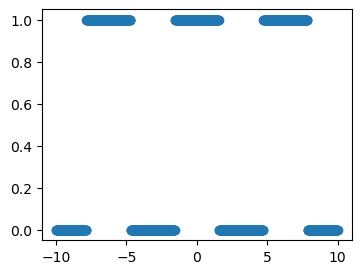

In [65]:
plt.figure(figsize=(4,3))
plt.scatter(data[:,0], tgt);

In [66]:
mi = ftr_sel.mutual_info_classif(data, tgt,
                                discrete_features=False)
print(mi)

[0.68297968 0.00196149]


In [67]:
xs = np.linspace(-10, 10, 1000).reshape(-1, 1)
data = np.c_[xs, np.random.uniform(-10, 10, xs.shape)]  
tgt = np.cos(xs).flatten()

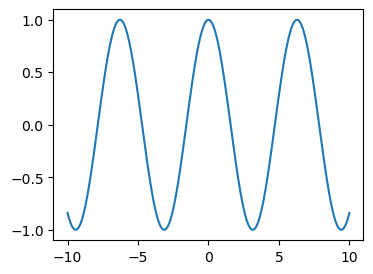

In [68]:
plt.figure(figsize=(4,3))
plt.plot(data[:,0], tgt);

In [69]:
print(ftr_sel.f_regression(data, tgt)[0],
     ftr_sel.mutual_info_regression(data, tgt),
     sep = '/n ')

[2.29814105e-29 3.26105844e-01]/n [1.93526469 0.        ]


In [70]:
xs, ys = np.mgrid[-2:2:.2, -2:2:.2]
c_tgt = (ys > xs**2).flatten()

r_tgt = ((xs**2 + ys**2)*(ys/xs**2))

data = np.c_[xs.flat, ys.flat]

print(np.c_[data, c_tgt, r_tgt.flat][np.arange(0, 401, 66)])

[[ -2.          -2.           0.          -4.        ]
 [ -1.4         -0.8          0.          -1.06122449]
 [ -0.8          0.4          0.           0.5       ]
 [ -0.2          1.6          1.         104.        ]
 [  0.6         -1.2          0.          -6.        ]
 [  1.2          0.           0.           0.        ]
 [  1.8          1.2          0.           1.73333333]]


/var/folders/62/wk7d6m657c77jqhkywh7b8140000gn/T/ipykernel_56927/557847951.py:4: RuntimeWarning: divide by zero encountered in true_divide
  r_tgt = ((xs**2 + ys**2)*(ys/xs**2))
/var/folders/62/wk7d6m657c77jqhkywh7b8140000gn/T/ipykernel_56927/557847951.py:4: RuntimeWarning: invalid value encountered in true_divide
  r_tgt = ((xs**2 + ys**2)*(ys/xs**2))


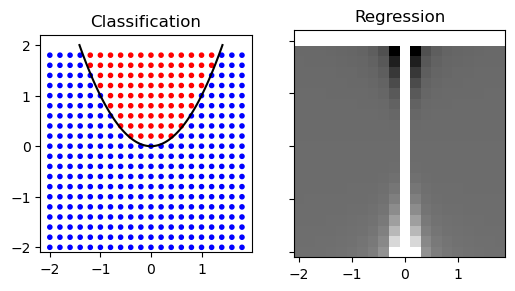

In [71]:
fig, axes = plt.subplots(1,2, figsize=(6,3), sharey=True)
axes[0].scatter(xs, ys, c= np.where(c_tgt, 'r', 'b'), marker=".")
axes[0].set_aspect('equal');

bound_xs = np.linspace(-np.sqrt(2), np.sqrt(2), 100)
bound_ys = bound_xs**2
axes[0].plot(bound_xs, bound_ys, 'k')
axes[0].set_title("Classification")

axes[1].pcolormesh(xs, ys, r_tgt, cmap='binary')
axes[1].set_aspect('equal')
axes[1].set_title("Regression");

In [72]:
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif

ftrsel = SelectKBest(mutual_info_classif, k=5)
selected_features = ftrsel.fit_transform(wine_train, wine_train_tgt)

keepers_idx = ftrsel.get_support()
print(np.array(wine.feature_names)[keepers_idx])

['flavanoids' 'color_intensity' 'hue' 'od280/od315_of_diluted_wines'
 'proline']


In [73]:
ftrsel = SelectKBest(ftr_sel.f_classif, k=5)
ftrsel.fit_transform(wine_train, wine_train_tgt)

keepers_idx = ftrsel.get_support()
print(np.array(wine.feature_names)[keepers_idx])

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


In [74]:
ftrsel = ftr_sel.SelectPercentile(ftr_sel.f_regression,
                                 percentile=25)
ftrsel.fit_transform(diabetes_train_ftrs,
                    diabetes_train_tgt)

print(np.array(diabetes.feature_names)[ftrsel.get_support()])

['bmi' 'bp' 's5']


In [75]:
ftrsel = ftr_sel.SelectPercentile(ftr_sel.mutual_info_regression, percentile=25)
ftrsel.fit_transform(diabetes_train_ftrs, diabetes_train_tgt)
print(np.array(diabetes.feature_names)[ftrsel.get_support()])

['bmi' 's4' 's5']


In [76]:
from sklearn import feature_selection as ftr_sel
from sklearn.ensemble import RandomForestClassifier

ftrsel = ftr_sel.SelectFromModel(RandomForestClassifier(), threshold='mean')
ftrsel.fit_transform(wine_train, wine_train_tgt)
print(np.array(wine.feature_names)[ftrsel.get_support()])

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


In [77]:
from sklearn import feature_selection as ftr_sel
from sklearn.linear_model import LogisticRegression

lmlr = LogisticRegression(penalty='l1', solver='liblinear')
ftrsel = ftr_sel.SelectFromModel(lmlr)

ftrsel.fit_transform(wine_train, wine_train_tgt)
print(np.array(wine.feature_names)[ftrsel.get_support()])

['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium' 'flavanoids'
 'proanthocyanins' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


In [78]:
ftrsel = ftr_sel.RFE(RandomForestClassifier(), n_features_to_select=5)
res = ftrsel.fit_transform(wine_train, wine_train_tgt)
print(np.array(wine.feature_names)[ftrsel.get_support()])

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


In [79]:
ftrsel = ftr_sel.RFE(linear_model.LinearRegression(),
                    n_features_to_select=5)
ftrsel.fit_transform(wine_train, wine_train_tgt)
print(np.array(wine.feature_names)[ftrsel.get_support()])

['alcohol' 'total_phenols' 'flavanoids' 'hue'
 'od280/od315_of_diluted_wines']


In [80]:
print(ftrsel.ranking_,
     ftrsel.estimator_.coef_, sep='\n')

[1 5 2 4 9 1 1 3 7 6 1 1 8]
[-0.21637281  0.12811915 -0.39364306 -0.63943561 -0.35723562]


In [81]:
keepers_idx = np.argsort(np.abs(ftrsel.estimator_.coef_))

keepers_order_idx = np.where(ftrsel.ranking_ == 1)[0][keepers_idx]
print(np.array(wine.feature_names)[keepers_order_idx])

['total_phenols' 'alcohol' 'od280/od315_of_diluted_wines' 'flavanoids'
 'hue']


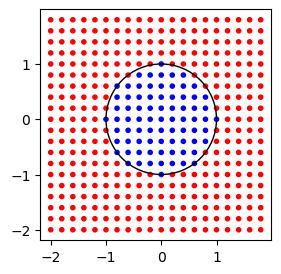

In [82]:
xs, ys = np.mgrid[-2:2:.2, -2:2:.2]
tgt = (xs**2 + ys**2 > 1).flatten()
data = np.c_[xs.flat, ys.flat]

fig, ax = plt.subplots(figsize=(4,3))

ax.scatter(xs, ys, c=np.where(tgt, 'r', 'b'), marker='.')
ax.set_aspect('equal');

circ = plt.Circle((0,0), 1, color='k', fill=False)
ax.add_patch(circ);

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model

def plot_boundary(ax, data, tgt, classifier, class_indices):
    # Fit the classifier on the data
    classifier.fit(data, tgt)

    # Plot the decision boundary
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    # Plot the data points
    colors = ['red', 'blue']
    for idx, color in zip(class_indices, colors):
        ax.scatter(data[tgt == idx, 0], data[tgt == idx, 1], c=color, edgecolors='k')

def get_model_name(classifier):
    return str(classifier.__class__.__name__)

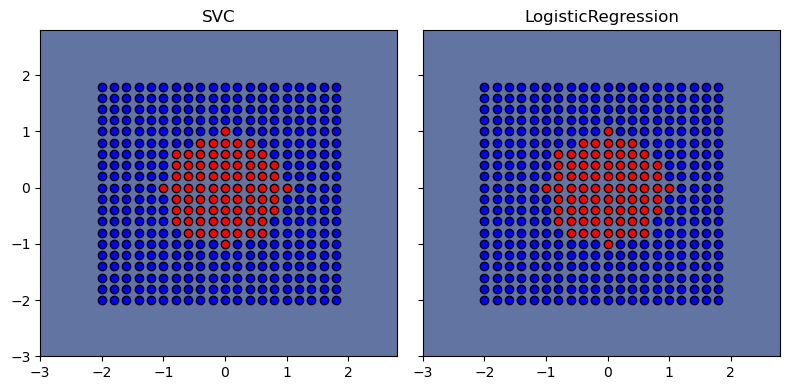

In [84]:
from sklearn import svm, linear_model
import matplotlib.pyplot as plt

shootout_linear = [svm.SVC(kernel='linear'),
                  linear_model.LogisticRegression()]

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for mod, ax in zip(shootout_linear, axes):
    plot_boundary(ax, data, tgt, mod, [0, 1])
    ax.set_title(get_model_name(mod))
plt.tight_layout()

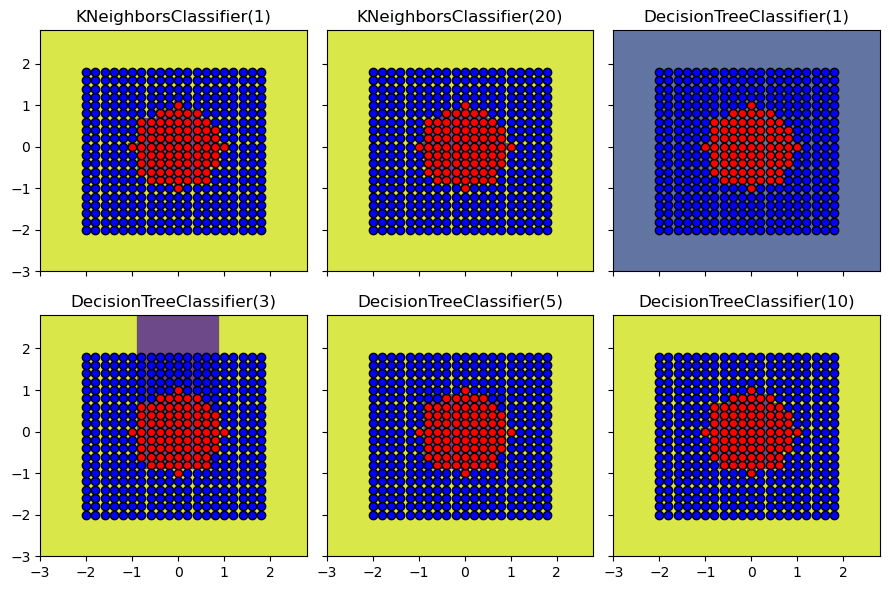

In [85]:
from sklearn import neighbors, tree
import matplotlib.pyplot as plt

knc_p, dtc_p = [1, 20], [1, 3, 5, 10]
KNC = neighbors.KNeighborsClassifier
DTC = tree.DecisionTreeClassifier
shootout_nonlin = ([(KNC(n_neighbors=p), p) for p in knc_p] +
                  [(DTC(max_depth=p), p) for p in dtc_p])

fig, axes = plt.subplots(2, 3, figsize=(9, 6), sharex=True, sharey=True)
for (mod, param), ax in zip(shootout_nonlin, axes.flat):
    plot_boundary(ax, data, tgt, mod, [0, 1])
    ax.set_title(get_model_name(mod) + "({})".format(param))

plt.tight_layout()

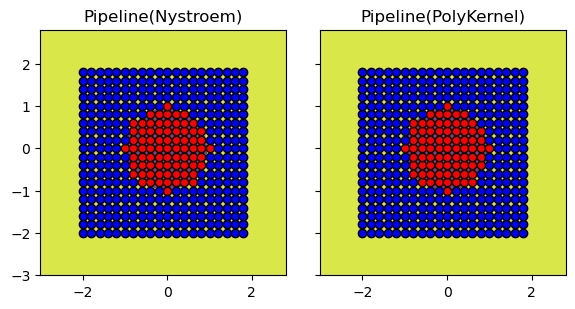

In [90]:
from sklearn import kernel_approximation
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline
import matplotlib.pyplot as plt

# Assuming you have defined the functions plot_boundary, get_model_name, data, tgt

kn = kernel_approximation.Nystroem(kernel='polynomial', degree=2, n_components=6)
LMLR = linear_model.LogisticRegression()
k_logreg1 = pipeline.make_pipeline(kn, LMLR)

poly_kn = PolynomialFeatures(degree=2)  # Use PolynomialFeatures for the polynomial kernel
k_logreg2 = pipeline.make_pipeline(poly_kn, LMLR)

shootout_fancy = [(k_logreg1, 'Nystroem'), (k_logreg2, 'PolyKernel')]

fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
for (mod, kernel_name), ax in zip(shootout_fancy, axes):
    plot_boundary(ax, data, tgt, mod, [0, 1])
    ax.set_title(get_model_name(mod) + "({})".format(kernel_name))
    ax.set_aspect('equal')
plt.tight_layout()

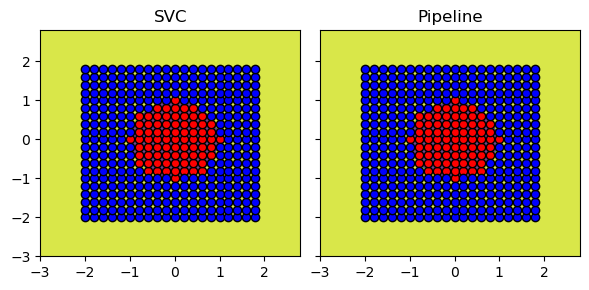

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline
import matplotlib.pyplot as plt

poly_kn = PolynomialFeatures(degree=2)  
k_logreg = pipeline.make_pipeline(poly_kn, linear_model.LogisticRegression())

shootout_fancy = [svm.SVC(kernel='poly', degree=2), k_logreg]

fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
for mod, ax in zip(shootout_fancy, axes):
    plot_boundary(ax, data, tgt, mod, [0, 1])
    ax.set_title(get_model_name(mod))

plt.tight_layout()

In [98]:
data = np.array([[1, 2, 4, 5],
                [2.5,.75,5.25,3.5]]).T
mean = data.mean(axis=0)
centered_data = data - mean

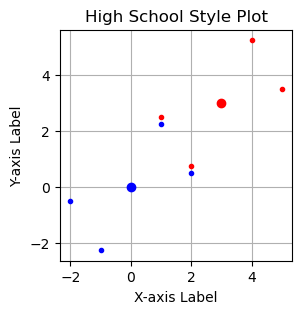

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def high_school_style(ax):
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title('High School Style Plot')
    ax.grid(True)

# Assuming you have the necessary data and mean variables

fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(*data.T, 'r.')
ax.plot(*mean, 'ro')

ax.plot(*centered_data.T, 'b.')
ax.plot(*centered_data.mean(axis=0), 'bo')

high_school_style(ax)

plt.show()

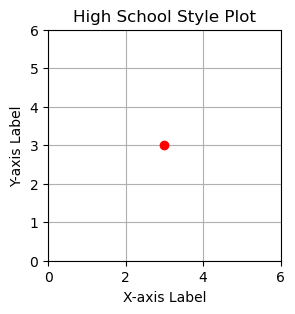

In [102]:
fig, ax = plt.subplots(figsize=(3,3))
orig_data = centered_data + mean 
plt.plot(*orig_data.mean(axis=0), 'ro')

ax.set_xlim((0,6))
ax.set_ylim((0,6))
high_school_style(ax)

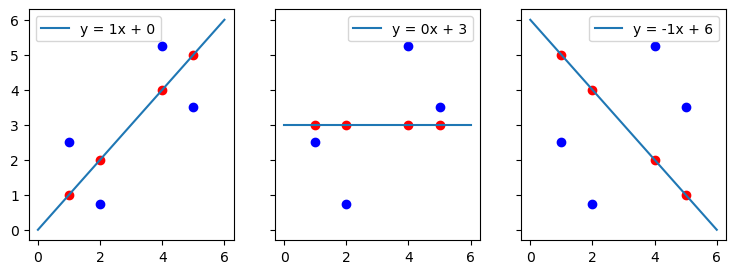

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines_and_projections(axes, lines, data, xs):
    for ax, (a, b) in zip(axes, lines):
        ys = a * xs + b
        ax.plot(xs, ys, label=f'y = {a}x + {b}')
        projections = np.array([[x, a * x + b] for x in data[:, 0]])
        ax.scatter(data[:, 0], data[:, 1], color='blue')
        ax.scatter(projections[:, 0], projections[:, 1], color='red')
        ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
xs = np.linspace(0, 6, 30)
lines = [(1, 0), (0, 3), (-1, 6)]
data = np.array([[1, 2, 4, 5],
                [2.5, 0.75, 5.25, 3.5]]).T

plot_lines_and_projections(axes, lines, data, xs)

plt.show()

Lengths: [5.60666923 1.26833077]


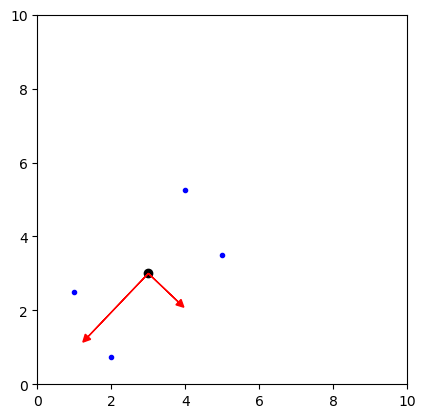

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

ax = plt.gca()
ax.scatter(data[:, 0], data[:, 1], c='b', marker='.')

mean = np.mean(data, axis=0, keepdims=True)
centered_data = data - mean
ax.scatter(*mean.T, c='k')

pca = PCA()  
P = pca.fit_transform(centered_data)

directions = pca.components_
lengths = pca.explained_variance_
print("Lengths:", lengths)
var_wgt_prindirs = -np.diag(lengths).dot(directions)

for d, l in zip(directions, lengths):
    arrow_start = mean[0] 
    arrow_end = mean[0] + np.sqrt(l) * d  
    ax.arrow(arrow_start[0], arrow_start[1], arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
             head_width=0.2, head_length=0.2, fc='r', ec='r')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')

plt.show()

In [108]:
print(np.allclose(np.cov(data, rowvar=False),
                 np.cov(centered_data, rowvar=False)))

True


In [109]:
orig_cov = np.cov(centered_data, rowvar=False)
print(orig_cov)
print(np.diag(orig_cov).sum())

[[3.33333333 2.16666667]
 [2.16666667 3.54166667]]
6.875


In [110]:
EPS = 2.2e-16
p_cov = np.cov(P, rowvar=False)
p_cov[p_cov<EPS] = 0.0
print(p_cov)
print(p_cov.sum())

[[5.60666923 0.        ]
 [0.         1.26833077]]
6.875000000000002


In [114]:
def make_rotation(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]]).T

In [115]:
spacing = np.linspace(0, 2 * np.pi, 17)
points = np.c_[np.sin(spacing), np.cos(spacing)]  # Replace np.c with np.c_

two_points = points[[0, 3]]
rot = make_rotation(np.pi / 8)
scale = np.diag([2, 0.5])

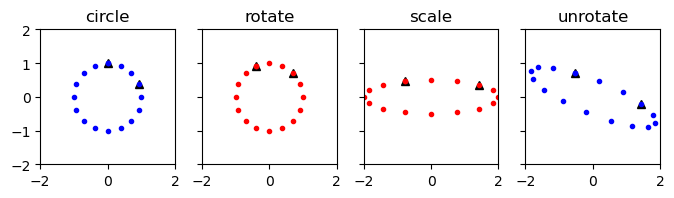

In [116]:
fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True)

axes[0].plot(*two_points.T, 'k^')
axes[0].plot(*points.T, 'b.')

axes[1].plot(*np.dot(two_points, rot).T, 'k^')
axes[1].plot(*np.dot(points, rot).T, 'r.')

axes[2].plot(*two_points.dot(rot).dot(scale).T, 'k^')
axes[2].plot(*points.dot(rot).dot(scale).T, 'r.')

axes[3].plot(*two_points.dot(rot).dot(scale).dot(rot.T).T, 'k^')
axes[3].plot(*points.dot(rot).dot(scale).dot(rot.T).T, 'b.')

names = ['circle', 'rotate', 'scale', 'unrotate']
for ax, name in zip(axes, names):
    ax.set_aspect('equal')
    ax.set_title(name)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

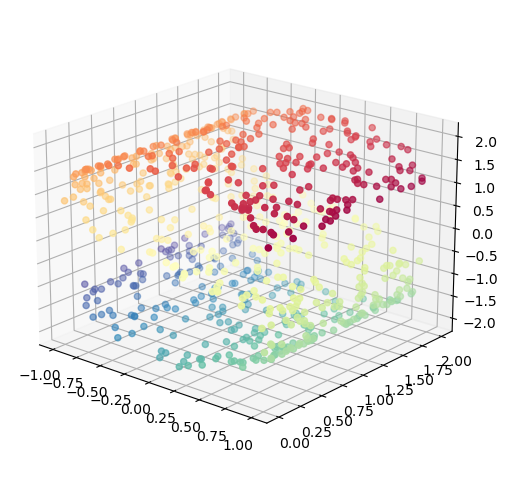

In [118]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import manifold
import matplotlib.pyplot as plt

data_3d, color = datasets.make_s_curve(n_samples=750, random_state=42)

cmap = plt.cm.Spectral
fig = plt.figure(figsize=(6, 6))  # Corrected 'figsize' argument to a tuple
ax = fig.add_subplot(111, projection='3d')  # Correct placement of 'projection' argument
ax.scatter(*data_3d.T, c=color, cmap=cmap)  # Plot the data points with colors
ax.view_init(20, -50)

plt.show()

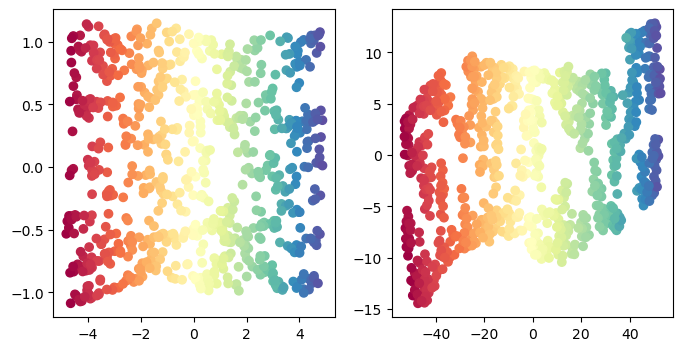

In [120]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import manifold
import matplotlib.pyplot as plt

data_3d, color = datasets.make_s_curve(n_samples=750, random_state=42)

cmap = plt.cm.Spectral
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Use plt.subplots() instead of plt.subplot()

n_components = 2

isomap = manifold.Isomap(n_neighbors=10, n_components=n_components)
data_2d = isomap.fit_transform(data_3d)
axes[0].scatter(*data_2d.T, c=color, cmap=cmap)

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=42)
data_2d = tsne.fit_transform(data_3d)
axes[1].scatter(data_2d[:, 0], data_2d[:, 1], c=color, cmap=cmap)  # Separate X and Y coordinates

plt.show()